## Q1 Unbiased Estimator of Variance

Let  $X_1, X_2, ..., X_n $ be i.i.d. random variables with common mean $\mu$ and variance $\sigma^2 $. Define the sample mean as:

$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
$

Show that the statistic $S^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})^2$ is an **unbiased estimator** of $\sigma^2 $; that is, $\mathbb{E}[S^2] = \sigma^2$

**Hint:** Define $ R_i = X_i - \bar{X} $, and show that $\mathrm{Var}(R_i) = \frac{n - 1}{n} \sigma^2$

### Solution:

We know that,

$\mathrm{Var}(R_i) = \mathrm{Var}(X_i - \bar{X})$
$= \mathrm{Var}(X_i) + \mathrm{Var}(\bar{X}) - 2\times\mathrm{Cov}(X_i, \bar{X})$

Also,

$\mathrm{Cov}(X_i, \bar{X}) = \mathrm{Cov}(X_i, \frac{1}{n} \sum_{j=1}^{n} X_j)$
$=\frac{1}{n} \sum_{j=1}^{n} \mathrm{Cov}(X_i,X_j)$

As $X_i$ is independent of all $X_j$; then for $j\neq i \text{ } \mathrm{Cov}(X_i, X_j) = 0$, and for $ j = i \text{ } \mathrm{Cov}(X_i, X_i) = \mathrm{Var}(X_i) = \sigma^2$
<br>
Therefore,

$\mathrm{Cov}(X_i, \bar{X}) = \frac{1}{n} \times (0 + \sigma^2) = \frac{\sigma^2}{n}$ 
  
Hence,

$\mathrm{Var}(R_i) = \mathrm{Var}(X_i) + \mathrm{Var}(\bar{X}) - 2\times\frac{\sigma^2}{n}$

$\mathrm{Var}(R_i) = \sigma^2 + \frac{\sigma^2}{n} - \frac{2\sigma^2}{n}$

$\mathrm{Var}(R_i) = \frac{n-1}{n}\sigma^2$

Using summation on both sides

$\sum_{i=1}^{n} \mathrm{Var}(R_i) = \sum_{i=1}^{n} \frac{n-1}{n}\sigma^2 = (n-1)\sigma^2$ ...eqn 1


Now,

$\mathrm{Var}(R_i) = \mathbb{E}(R_i^2) - (\mathbb{E}(R_i))^2$

But we know that $\mathbb{E}(R_i) = 0$, therefore,

$\mathrm{Var}(R_i) = \mathbb{E}((X_i - \bar{X})^2)$

Now using summation on both sides

$\sum_{i=1}^{n} \mathrm{Var}(R_i) = \sum_{i=1}^{n} \mathbb{E}((X_i - \bar{X})^2) = \mathbb{E}(\sum_{i=1}^{n} (X_i - \bar{X})^2)$ ...eqn 2


Using eqn 1 and eqn 2

$\mathbb{E} (\sum_{i=1}^{n} (X_i - \bar{X})^2) = (n-1)\sigma^2$


From given $S^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})^2$, therefore

$\mathbb{E}(S^2) = \frac{1}{n-1} \mathbb{E} (\sum_{i=1}^{n} (X_i - \bar{X})^2) = \frac{1}{n-1} (n-1)\sigma^2$

Therefore, $\mathbb{E}(S^2) = \sigma^2$ 

Hence proved that the sample variance is an unbiased estimator of $\sigma^2$.

## Q2

In [1]:
confBand <- function(x, y, conf = 0.95) {
  model <- lm(y ~ x)

  x_grid <- seq(min(x), max(x), length.out = 100)
  pred_df <- data.frame(x = x_grid)

  pointwise <- predict(model, newdata = pred_df, interval = "confidence", level = conf)

  alpha <- 1 - conf
  n <- length(x_grid)

  # Bonferroni adjusted confidence level
  adjusted_level <- 1 - alpha / n
  simultaneous <- predict(model, newdata = pred_df, interval = "confidence", level = adjusted_level)

  options(repr.plot.width = 16, repr.plot.height = 12)

  plot(x, y, pch = 16, col = "gray", main = "Best Fit Line, Pointwise and Simultaneous Confidence Band", xlab = "x", ylab = "y")
  abline(model, col = "blue", lwd = 2)

  lines(x_grid, pointwise[, "lwr"], col = "green", lty = 2)
  lines(x_grid, pointwise[, "upr"], col = "green", lty = 2)

  lines(x_grid, simultaneous[, "lwr"], col = "red", lty = 3)
  lines(x_grid, simultaneous[, "upr"], col = "red", lty = 3)

  legend("topleft", legend = c("Best Fit Line", "Pointwise Confidence Band", "Simultaneous Confidence Band"),
    col = c("blue", "green", "red"), lty = c(1, 2, 3), bty = "n")
}

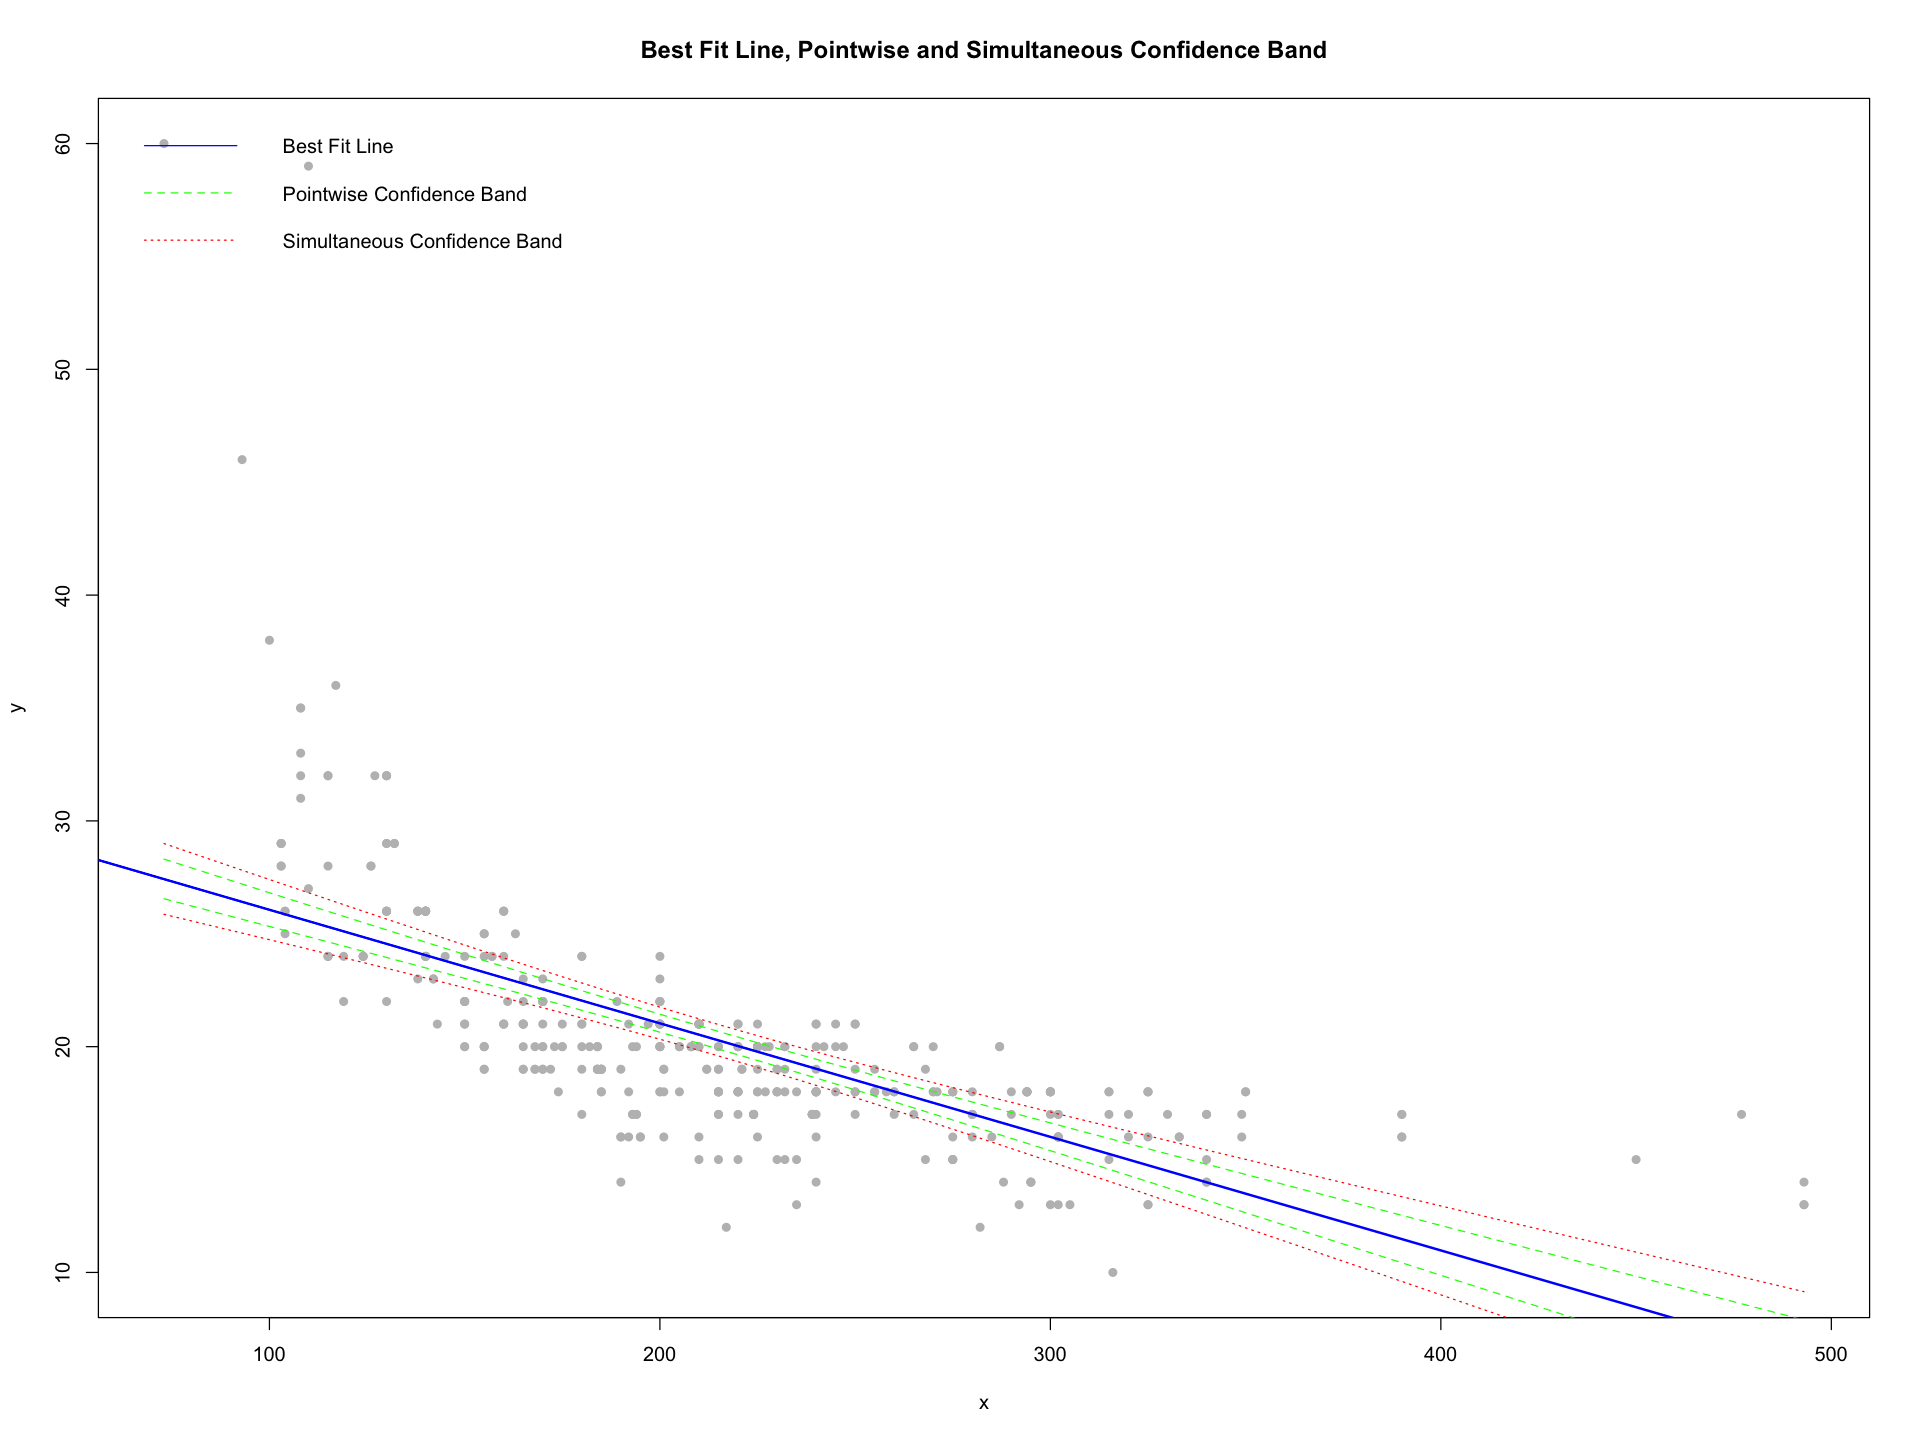

In [3]:
load(file='04cars.rda')
dat <- na.omit(dat)
confBand(dat[,"Horsepower"],dat[,"City_MPG"])

The blue line is the least squares line. The green lines are the boundaries of the Point-Wise Confidence Band. The red lines are the boundaries of the Simultaneous Confidence Band. As expected, the simultaneous confidence bad is wider. Upon visual inspection, we note that a linear model is not a good fit for this data. If the data were really linear, then the simultaneous confidence band has a 95% probability of containing the true parameters (coefficient and intercept), and for any given X, the fixed point confidence band has a 95% probability of containing the true parameters.

## Q3

In [5]:
set.seed(42)

# Parameters
n <- 100
N <- 1000
alpha <- 0.05
sigma2 <- 0.2
beta <- c(3, 0.5)

# Fixed design
x <- sort(runif(n))
X <- cbind(1, x)  # design matrix
p <- ncol(X)

# Containers for results
pointwise_hits <- 0
simultaneous_hits <- 0

for (i in 1:N) {
    
  epsilon <- rnorm(n, mean = 0, sd = sqrt(sigma2))
  y <- X %*% beta + epsilon

  # Fitting linear model
  fit <- lm(y ~ x)
  beta_hat <- coef(fit)
  y_hat <- X %*% beta_hat

  # Estimating sigma^2
  sigma_hat <- summary(fit)$sigma

  # Compute (X^T X)^-1
  XtX_inv <- solve(t(X) %*% X)

  # Standard error of x^T beta_hat at each x
  SE_vec <- sqrt(rowSums((X %*% XtX_inv) * X)) * sigma_hat

  # Pointwise t-quantile
  t_pointwise <- qt(1 - alpha / 2, df = n - p)

  # Pointwise CI
  lower_pw <- y_hat - t_pointwise * SE_vec
  upper_pw <- y_hat + t_pointwise * SE_vec

  # Check if true values are inside pointwise band
  mu_true <- X %*% beta
  pointwise_hits <- pointwise_hits + all(mu_true >= lower_pw & mu_true <= upper_pw)

  t_simul <- qt(1 - alpha / (2 * n), df = n - p)

  lower_sim <- y_hat - t_simul * SE_vec
  upper_sim <- y_hat + t_simul * SE_vec

  # Check if true line is inside simultaneous band
  simultaneous_hits <- simultaneous_hits + all(mu_true >= lower_sim & mu_true <= upper_sim)
}

cat("Pointwise band covered true line in", pointwise_hits / N, "of runs\n")
cat("Simultaneous band covered true line in", simultaneous_hits / N, "of runs\n")


Pointwise band covered true line in 0.867 of runs
Simultaneous band covered true line in 1 of runs


The pointwise bands, while having nominal 95% coverage at individual x-values, only covered the entire true regression line in 86.7% of the simulations. This is expected because pointwise intervals do not adjust for the multiple comparisons across all x-values. On the other hand, the simultaneous confidence bands, which are wider and account for the entire range of x-values, successfully covered the true line in 100% of the simulations.

## Project

1) We chose the dataset about Energy Efficiency. This dataset compares different building shapes and other controlled conditions to determine the energy efficiency of these different conditions. Furthermore, the data in this dataset is simulated. It is really interesting how such a complex real-world setting with lots of related variables can be simulated while still generating interesting results. Furthermore, with challenges faced by climate change, and an increasing focus on electricity usage and individual solar generation, this topic provides further insight into possible ways to build more energy-efficient houses.

2) This dataset is presented in the paper "Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools". This paper also describes the variables in the data. We summarize this information in the table below:

| Variable | Description | Data Type | Units |
| -------- | ------- | ----- | ------ |
| Relative Compactness (X1) | Ratio of External Surface Area to Volume | Floating Point | meter inversed |
| Surface Area (X2) | Total surface area of the house | Floating Point | meters squared |
| Wall Area (X3)    | Total area of the walls | Floating Point | meters squared |
| Roof Area (X4) | Total area of the roof | Floating Point | meters squared |
| Overall Height (X5) | Height of the house | Floating Point | meters |
| Orientation (X6) | Which cardinal direction the house faces | Catgorical Integer | |
| Glazing Area (X7) | Percentage of Floor covered in Glazing | Floating Point | |
| Glazing Area Distribution (X8) | Distribution of Glazing in different cardinal directions | Categorical Integer | |
| Heating Load (Y1) | Energy required to maintain temperature when cold outside | Floating Point | British Thermal Units (BTU) |
| Cooling Load (Y2) | Energy required to maintain temperature when hot outside | Floating Point | British Thermal Units (BTU) |

## Contributions

Devana: Q1, Q3, Project discussion

Samyak: Q2, Project questions